# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smatcab does not move, which is expected as no code has been written to guide the vehicle's movements yet. However, it does appear that there are rewards and penalties associated with the vehicle's behavior. These are clearly in place to guide the vehicle's learning to ensure that it performs to specifications. The vehicle is rewarded for idling at a red light, it is rewarded less for idling at a green light when there is oncoming traffic, and the vehicle is heavily penalized if it takes no action when the light is green and there is no oncoming traffic. The vehicle's initial location also appears to be selected at random each time the program is run. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**agent.py:**
- num_dummies: This flag controls the number of other cars in the environment. It defaults to generating 100 other vehicles.
- grid_size: This flag controls the number of intersections in the environment and is entered as (x,y) where x is the horizontal dimension and y is the vertical dimension. It defaults to an 8x6 grid, which generates 48 intersections.
- update_delay: This flag controls the time between actions and defaults to 2.0s.

**environment.py:**

The act() class function is called when an agent performs an action. The action is performed if it is legal and a reward is given based on traffic laws.

**simulator.py:**

The render_text() function prints the simulation output to the terminal window. The render() function provides a graphical interpretation of the simulation output using pygame.

**planner.py:**

The next_waypoint() function considers the East-West direction first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


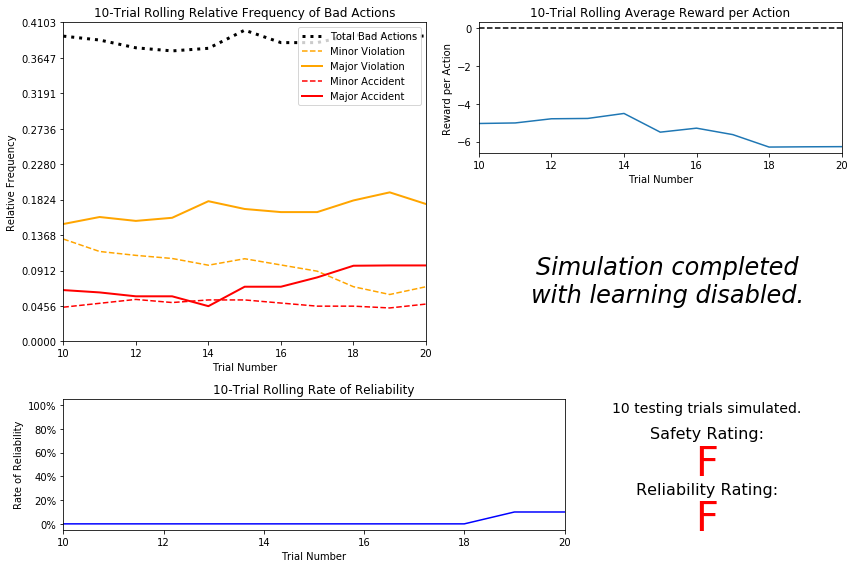

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
The driving agent appears to be making bad decisions for ~32%-36% of all actions, of all the actions approximately 8%-10% cause accidents. This is expected since the vehicle is making decisions completely at random and no learning algorithm is being applied. Due to this the vehicle consistently receives negative rewards on average, which implies that it is constantly being negatively rewarded for its errors. The outcome doesn't change as the number of trials increases becuase it is driving completley at random, which makes it unsafe and unreliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The waypoint feature is necessary to ensure that the smartcab is efficient. This feature will have no impact on the safety of the vehicle as it only indicates the optimal direction for the smartcab to drive.

The light feature is necessary to ensure that the smartcab does not run red lights. This is one of the most important features to ensure that the smartcab is safe.

The left feature only seems necessary if the smartcab is attempting to turn right on red. This feature could therefore potentially impact the safety and efficiency of the smartcab. This feature was inlcuded in the original state; however, during Question 7 it was discovered that removing this feature improved the overall performance of the smartcab. The reasoning behind this is discussed in more detail in Question 7.

Assuming that the vehicle to the right adheres to all traffic laws, it should not interfere with the smartcab. Therefore the right feature is not necessary.

Oncoming is necessary if the smartcab is attemtping to turn left. It must know if there is a vehicle that it could potentially collide with in order to perform this action safely and efficiently.

The deadline feature is not necessary to ensure safety or efficiency. It merely gives the number of actions left for the smartcab to reach the destination.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 

Original state used in Question 6:
`state = (waypoint, inputs['light'], inputs['left'], inputs['oncoming'])`

There are 3 possible states for waypoint, 2 possible states for light, and 4 possible states for both oncoming and left. There are therefore 3 x 2 x 4 x 4 = 96 possible states available to each of the 48 intersections. Therefore the agent must see at the very least 96 different training trials before exploring every possible state. The agent also has 4 actions at its disposal and will therefore likely need to visit a state more than once in order to determine the optimal action to take for a particular state.

Ammended state used in Question 7 and beyond:
`state = (waypoint, inputs['light'], inputs['oncoming'])`

There are 3 x 2 x 4 = 24 possible states available to each of the 48 intersections. It is much more likely that the agent will be able to explore all of these states in a reasonable amount of time. 

Once again the reason for this change is described in Question 7. Essentially I decided to prioritize the safety and reliability of the smartcab and the ability for it to train relatively quickly and produce consistent results over multiple simulations over its ability to turn right on red. I believe this is an acceptable sacrifice to make for the benefits it has on the model.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

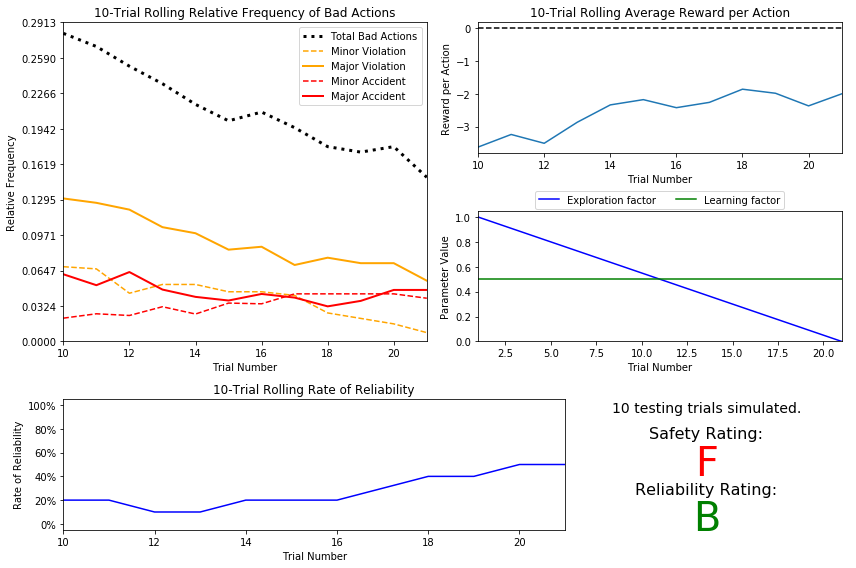

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Let me begin by stating that I ran this simulation more than 10 times and each time received differing results. I will therefore incorporate the ability of the simulation to reproduce the same results across different simulations into my discussion.

From running the simulation multiple times it becomes evident that any score is possible for both the Safety Rating and Reliability Rating; however, the Safety Rating tends to be low (generally it receives an F) and the Reliability Rating tends to be an acceptable value (usually at least an A). Note: I did receive the highest and lowest possible scores for both ratings over the course of my simulation trials and it seems that the Safety Rating is more often an F than the Reliability Rating is an A. I therefore believe that the above results are a good indication of an average simulation run. Although, once again, the Reliability Rating is not entirely reliable across different simulations. The only strong similarity between the default Q-Learning simulation and the basic driving agent is that they both are unable to perform safely. I would also argue that the reliability rating of the default agent is also questionable as it is able to fluctuate greatly across different simulations. Increasing the number of testing trials could remedy the problem by allowing the agent to more fully test what it learns on a larger set of scenarios. This would produce a Safety and Reliability Rating that is more highly representative of the agent's true performance capabilities.

It took 21 training trials before the agent began testing. The number of training trials makes sense based on the epsilon function and tolerance value; however, obtaining the correct number of training trials required me to fix representation errors. These errors arise if the epsilon function is entered into code exactly as it is stated above. It is also necessary to incorporate the trial number as part of the epsilon function in order to ensure that the first trial is run using the initial value for epsion. I know this because I ran the code with three different epsilon functions that I will detail below.

**Equation 1:**

`self.epsilon -= 0.05`

When implementing this equation the agent never uses the initial value for epsilon, which it should since the agent should pick a random action 100% of the time for the first training trial. Instead it uses 0.95 as its initial epsilon value. This equation also produces a representation error on the second training trial and for all subsequent training trials. The value for epsilon should be 0.90 for the second training trial, but this equation produces a value of 0.8999, where the 9's repeat ad infinitum.

**Equation 2:**

`self.epsilon = self.epsilon2 - self.t*0.05`

Where self.epsilon2 is the initial value for epsilon and self.t is the trial number. The initial trial number is 0, which corrects the error described above of not selecting a random action 100% of the time for the first trial. The first representation error occurs on the 8th training trial where epsilon is calculated to be 0.64999... instead of 0.65. Of note is the representation error at trial 20. Instead of epsilon being equal to 0.05 it is calculated to be 0.04999... which is evaluated to be less than 0.05 (the tolerance) causing the training to end 1 step earlier than it should. This can be understood by looking at lines 130-139 in the simulator.py file.

**Equation 3:**

`self.epsilon = ((self.epsilon2)*correction - self.t*5)*1./correction`

Where correction is equal to 100 and is used to correct any representation errors by ensuring that self.epsilon2 is a whole number prior to performing any arithmetic. After the value is calculated it is divided by 100 in order to adjust the decimal placement. Note: 0.05 is not explicitly multiplied by correction in the code, instead it is replaced by 5. Using this equation for epsilon allows the agent to use the initial value for epsilon on its first trial and it allows epsilon to decay to 0 prior to beginning testing, which is what is correct according to the mechanics of the code found in lines 130-139 of the simulator.py file. Therefore it takes 21 (not 20) training trials until the agent begins testing since on trial 20 epsilon is correctly equal to 0.05 which is not less than 0.05, only on trail 21 when epsilon is equal to 0 is it less than 0.05. This function is properly represented in the paramters panel.

Implementing a function that decrements epsilon each training trial allows the Q-Learning algorithm to increasingly make more decisions based on information it has learned from exploring the environment, as opposed to always picking an action at random as is the case with the basic driving agent. This is reflected in the charts above and by the generally significantly better Reliability Rating. It is evident from the 10-Trial Rolling Relative Frequency of Bad Actions chart that the agent is continuously improving and committing fewer traffic violations each trial; however, the average reward for each action is still negative. Despite the average rewards remaining negative the average reward for each trial is increasing, which demonstrates that the agent is acting on the information it is learning. From this information it is apparent that the agent is learning and properly applying what it learns to perform increasingly better actions. However, the agent is still not performing safely, which indicates that the epsilon function along with other parameters will need to be adjusted. It seems that the agent would benefit from a longer training period and an epsilon function that places importance on exploring the environment more fully before applying what the agent learns.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

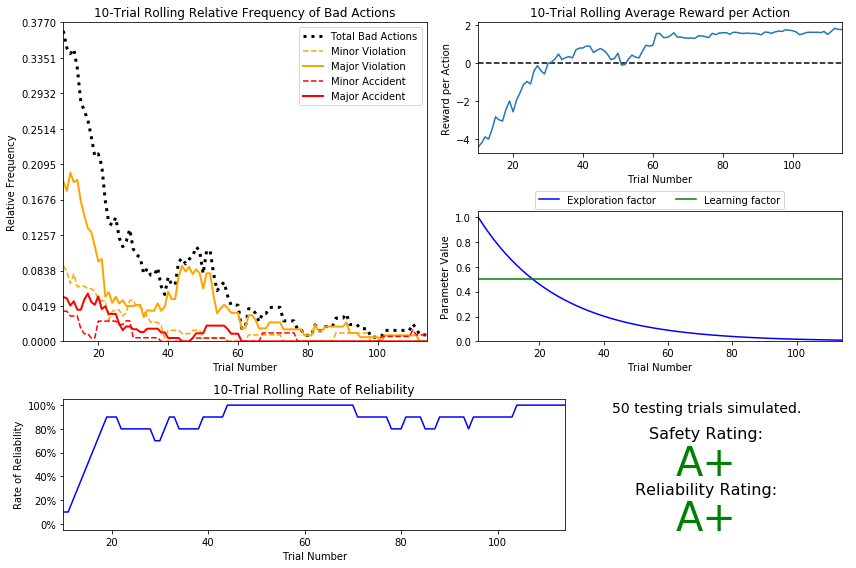

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

My goal for this part of the project was to develop a Q-Learning algorithm that produced relatively consistent results across various different simulation runs. Consistency and reproducibility across different simulations in my opinion is important to take into consideration because if for instance this is a product that is being deployed or code that is going to be impelemented in an array of vehicles, etc. it is important that it is able to perform safely and reliably in all deployments. Essentially a simulation can be thought of as a unique deployment/implementation of the code, and once again each implementation should be within a tolerable margin of error, which for me is scoring at least an A for both ratings most of the time. Not considering how the code acts across multiple simulations, or only presenting the best solution obtained by the code is poor quality control. The desire to produce an algorithm that can consistently perform at the appropriate levels for various simulations forced me to rethink and amend certain aspects of my code, which will be detailed below.

Previously I was using a state that took the following form: `state = (waypoint, inputs['light'], inputs['left'], inputs['oncoming'])`. I was able to tune the epsilon function and tolerance value such that after 162 training trials the agent generally performed well (yet still performed poorly more frequently than I was personally comfortable with) for 30 testing trials over the course of various simulations. After some deliberation I decided that the value the `inputs['left']` feature added to the model may not be worth the additional time it takes to train the agent and was likely negatively impacting the agent's consistency across various simulations. The `inputs['left']` feature is only necessary when the agent is in a position to take a right on red, an action that is at the driver's discretion and not required by law. Taking into consideration the fact that the smartcab code needs to be safe, reliable, quickly trainable, and consistently redepolyable I believe it is acceptable if the vehicle does not learn to turn right on red. It is more important for the agent to learn to consistently perform actions that are safe and that reliably deliver it and its occupants to the destination than it is for it to learn a rule that is not required by law.

After tuning the agent for the new state of the form: `state = (waypoint, inputs['light'], inputs['oncoming'])` I was able to obtain better results for 50 testing trials across multiple simulation runs with only 114 training trials per simulation. The epsilon function that was used for the new state is: `self.epsilon = self.epsilon2 * 0.96**self.t` where self.epsilon2 and self.t are defined in the description for Equation 2 in Question 6. When compared to the default Q-Learner, this function extends the learning time significantly and at around Trial 40 and beyond the Q-Learner is applying what it has learned 80% or more of the time, which approximately coincides with when the agent's average reward per action begins to be positive. A tolerance value of 0.01 produced the desired results for the new state (the old state required a value of 0.0075 or lower). Alpha was left to be the default value since acceptable results were obtained without altering it. When the agent uses the new state definition it could still potentially perform poorly for a simulation with the selected parameters; however, the likelihood of this occuring seems to be low.

This implementation is significantly better than the default Q-Learner from the previous section. It is able to consistently produce acceptable results (A or above) for both ratings over the course of multiple simulations for 50 (as opposed to only 10) testing trials. This implementation takes about 6 times as many training trials as the default implementation, but this is expected in order to build a robust model (it also performs at an acceptable level for 5 times as many testing trials).

Based on the results of my testing, it seems that the Q-Learner was able to successfully and repeatably learn an appropriate policy for multiple simulations. I am therefore satisifed with the safety and reliability ratings of the smartcab; however, I would like to have a metric that somehow measured the robustness or repeatbility of the Q-Learner by incorporating the number of simulations run.

`Example Safety Metric = V / (T * S)`

`Example Reliability Metric  = L / (T * S)`

Let S equal the total number of simulations run, T equal the number of testing trials per simulation, V equal the total number of unacceptable traffic violations that occured during the testing trials over the course of all the simulations run, and L equal the total number of times the agent was late arriving to its destination over the course of all the simulations run. An unacceptable traffic violation would be defined by the target score for the safety rating. I am targetting an A for both scores. The goal then would be to minimize these metrics. It would also be interesting to collect and average or otherwise combine the policies from simulations that produce acceptable results in order to produce a robust model that would then be subjected to a large number of testing trials in order to determine its viability.

Note: Due to reasons explained above the new state (`state = (waypoint, inputs['light'], inputs['oncoming'])`) will be used for the remainder of the project.




**Parameter selection reasoning for when the 'old state' was being used**

162 training trials were necessary before the agent was ready to begin testing. This is reasonable based on the epsilon function and the selected tolerance value of 0.0075. The tolerance value was selected to be the maximum value that generated the optimal results. First a value of 0.01 was tested and when this did not produce the required results a value of 0.005 was used. This value produced the desired result; however, in an effort to minimize the number of training trials prior to testing it was essential to explore tolerances between these two values. Being the mean of the upper and lower values,  0.0075 was an obvious first choice to test. This value produced optimal results and therefore was selected. Alpha was left to be the default value since optimal results were achieved without altering it.

**Excerpt from original answer when I was using the 'old state' that points to part of my motivation for pursuing consistency across multiple simulation runs**

The Q-Learner now performs safely and reliably, as opposed to only performing mostly reliably. It would therefore seem that the Q-Learner has learned an approrpiate policy and produces repeatable results with the selected parameter values. I tested the Q-Learner multiple times with the same parameter values to ensure that it does in fact produce repeatable results and that the results were not due to chance, which could easily be the case as was described in Question 6. I also noticed this was a problem while trying to tune the paramters. For certain values, running the Q-Learner would sometimes produce excellent results yet other times it would produce sub-optimal results even though the parameter values had not been changed. Generally it was the Safety Rating that would fluctuate between acceptable and unacceptable scores.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

As discussed earlier in Question 7, the set of parameters I selected to be a state are now 'waypoint' and the 'light', and 'oncoming' parameters from 'inputs'; `state = (waypoint, inputs['light'], inputs['oncoming'])`.


**The following are examples from the recorded state-action rewards of states that could be part of an optimal policy:**

`('right', 'red', 'forward')
 -- forward : -10.89
 -- right : -9.09
 -- None : 2.12
 -- left : -7.69`
 
This is ideal for the state I defined because the vehicle is at a red light and does not move. Recall that I sacrificed learning to turn right on red for consistent results across many simulations and the ability to train the agent relatively quickly. 
 
 
 `('forward', 'green', 'left')
 -- forward : 2.13
 -- right : 0.74
 -- None : 0.75
 -- left : 0.60`
 
This is an acceptable policy for this state. The vehicle has a green light and needs to travel forward to reach the destination, which it will do.


**The following are examples of states that would be part of a suboptimal policy:**

`('right', 'green', 'right')
 -- forward : 0.96
 -- right : 0.00
 -- None : 0.00
 -- left : -10.17`
 
This is a suboptimal policy for this state. The agent has the right of way to travel forward and to the right since the light is green. The agent should therefore have no trouble following the waypoint by turning right, but instead it will travel forward.
 
 `('left', 'green', 'right')
 -- forward : 1.17
 -- right : 0.00
 -- None : 0.00
 -- left : -9.95`
 
The agent needs to travel left at a green light where the oncoming vehicle is turning right. The agent should therefore wait at the intersection until the vehicle has completed turning and there is no oncoming traffic and then it should proceed to turn left. Instead the agent travels forward. Perhaps the agent learned that this was overall a more efficient action; however, ideally the agent should not perform any action here. This likely occured due to the interaction of lines 315-317 and lines 328-331 in the environment.py. Lines 315-317 penalize the agent for turning left when the light is green if the oncoming traffic is travelling forward or to the right and lines 328-331 penalize the agent for idling at a green light except for when the oncoming vehicle is turning left.
 
 
 `('left', 'green', 'forward')
 -- forward : 0.03
 -- right : 1.20
 -- None : -4.19
 -- left : -10.44`

The agent needs to travel left at a green light where the oncoming vehicle is travelling forward. Similar to above, the agent should therefore wait until the oncoming vehicle passes through the intersection and there is no oncoming traffic and then it should turn left. Instead the vehicle will turn right. This likely occurs for reasons similar to those described above.

**All recorded state-action rewards:**
 
`
/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------
`

`
('left', 'green', 'forward')
 -- forward : 0.03
 -- right : 1.20
 -- None : -4.19
 -- left : -10.44
`

`('right', 'green', 'right')
 -- forward : 0.96
 -- right : 0.00
 -- None : 0.00
 -- left : -10.17
`

`('forward', 'green', 'left')
 -- forward : 2.13
 -- right : 0.74
 -- None : 0.75
 -- left : 0.60
`

`('left', 'green', 'right')
 -- forward : 1.17
 -- right : 0.00
 -- None : 0.00
 -- left : -9.95
`

`('right', 'red', 'forward')
 -- forward : -10.89
 -- right : -9.09
 -- None : 2.12
 -- left : -7.69
`

`('forward', 'green', None)
 -- forward : 1.73
 -- right : 0.70
 -- None : -4.52
 -- left : 0.55
`

`('forward', 'red', 'forward')
 -- forward : -9.18
 -- right : -0.18
 -- None : 1.71
 -- left : -7.57
`

`('forward', 'red', 'right')
 -- forward : -24.35
 -- right : 0.00
 -- None : 2.18
 -- left : -29.94
`

`('left', 'red', 'left')
 -- forward : -19.12
 -- right : 1.06
 -- None : 1.31
 -- left : -27.97
`

`('right', 'red', 'left')
 -- forward : -7.39
 -- right : -2.97
 -- None : 2.04
 -- left : -7.48
`

`('right', 'red', 'right')
 -- forward : -20.27
 -- right : -8.65
 -- None : 0.74
 -- left : 0.00
`

`('left', 'red', 'right')
 -- forward : -7.10
 -- right : 0.00
 -- None : 1.56
 -- left : -19.69
`

`('forward', 'red', None)
 -- forward : -10.61
 -- right : 0.49
 -- None : 2.16
 -- left : -15.82
`

`('left', 'red', None)
 -- forward : -19.63
 -- right : 1.10
 -- None : 1.66
 -- left : -10.68
`

`('right', 'green', 'forward')
 -- forward : 0.59
 -- right : 1.34
 -- None : -3.21
 -- left : -10.34
`

`('right', 'red', None)
 -- forward : -10.43
 -- right : -1.99
 -- None : 2.29
 -- left : -25.04
`

`('forward', 'green', 'forward')
 -- forward : 1.32
 -- right : -0.29
 -- None : -5.15
 -- left : -14.73
`

`('forward', 'red', 'left')
 -- forward : -12.61
 -- right : -0.11
 -- None : 2.05
 -- left : -18.37
`

`('forward', 'green', 'right')
 -- forward : 2.17
 -- right : 0.75
 -- None : -2.92
 -- left : -9.94
`

`('left', 'red', 'forward')
 -- forward : -13.48
 -- right : 1.25
 -- None : 2.51
 -- left : -8.10
`

`('left', 'green', None)
 -- forward : 0.17
 -- right : 0.04
 -- None : -4.91
 -- left : 1.37
`

`('right', 'green', None)
 -- forward : 0.74
 -- right : 1.98
 -- None : -5.24
 -- left : 1.10
`

`('left', 'green', 'left')
 -- forward : 0.76
 -- right : 1.03
 -- None : 0.29
 -- left : 2.17
`

`('right', 'green', 'left')
 -- forward : 0.74
 -- right : 1.48
 -- None : 0.36
 -- left : 0.63`

# Note: Based on the reviewers comments I decided to implement a Boltzmann distribution. Results of the improved code are found below. Please use the adjusted simulator.py file included in the zip directory if you are rerunning my code so that you generate the properly named log files. Thanks!

## Implement a Q-Learning Driving Agent Using a Boltzmann Distribution

The reviewer left the following comment:
Your agent should be choosing a random action from a choice of actions that have the highest Q-value. For example, since all actions are initialized with a reward of zero, it’s possible that all four actions are considered “optimal”. Not having the agent choose a random action from this would imply that it always chooses, perhaps, the first available option.

This caused me to reflect on the problem. It bothered me that all possible actions were not being considered (actions would only be considered and randomly selected from the highest equivalent valued actions), because they are all possible actions. I wanted a distribution that allowed me to select actions with probabilities that reflect the current reward of performing that action (the action's energy state so to speak). I did some research and learned that Boltzmann distributions are used for this purpose, after refreshing my statistical mechanics knowledge I decided to implement a Boltzmann distribution so that all actions are possible, although some are more probable than others based on their "energy state" (once again this is merely the reward associated with that action). Epsilon still controls the balance between exploration and using learned behaviors; increasing epsilon (specifically an epsilon greater than 1) causes the agent to explore the action space and decreasing epsilon (specifically an epsilon less than 1) promotesthe use of learned behaviors.

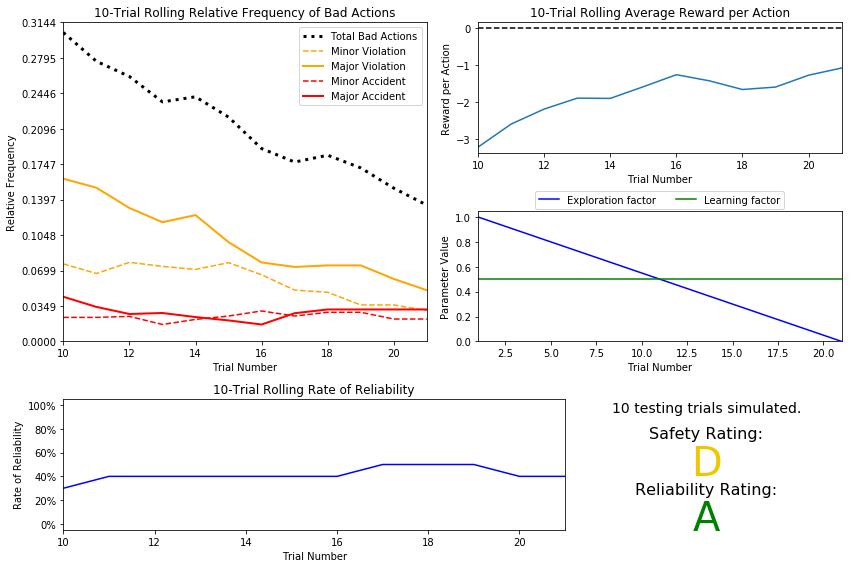

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_Boltzmann.csv')

Non optimized results using a Boltzmann distribution to determine the action of the smartcab produce better results overall, yet the results vary greatly over various simulation runs, which is expected as only 10 testing trials are being run.

## Improve the Q-Learning Driving Agent that Implements a Boltzmann Distribution

## Reminder: To obtain the results for the non-Boltzmann improved Q-learning the following parameter values were selected:

### Testing Trials = 50, Tolerance = 0.0075

## Parameter values necessary to obtain results found below where a Boltzmann distribution has been implemented to select the appropriate action
### Testing Trials = 50, Tolerance = 0.03

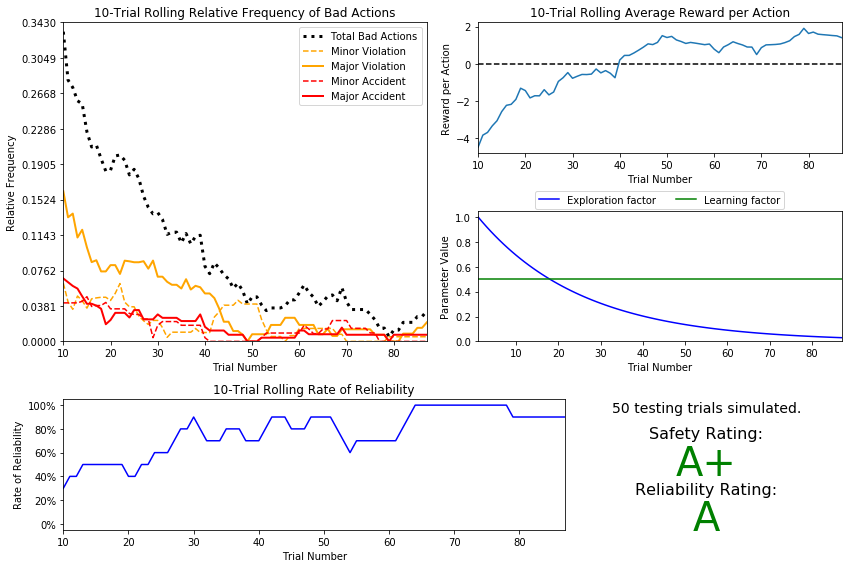

In [17]:
vs.plot_trials('sim_improved-learning_Boltzmann_50.csv')

It is immediately noticeable that the Boltzmann implementation is superior to the previous algorithm. It porduces relatively equivalent results across the same number of testing trials with a tolerance that is 4x greater than the original (0.03 vs. 0.0075). Below I will determine what tolerance value is required to receive excellent scores for 100 testing trials. I hypothesize that it can be done with a tolerance value that is still larger or very close to the original. 

### Testing Trials = 100, Tolerance = 0.01

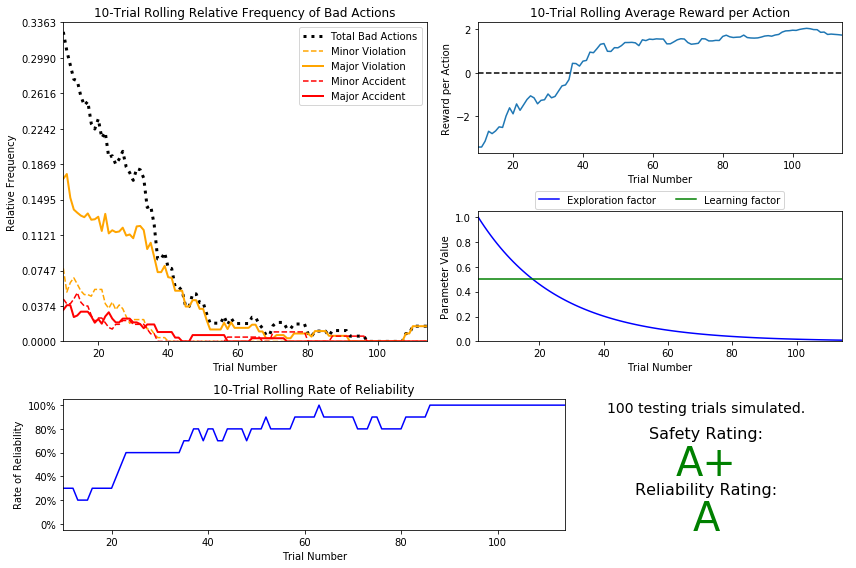

In [19]:
vs.plot_trials('sim_improved-learning_Boltzmann_100.csv')

My hypothesis was correct. By implementing a Boltzmann distribution I am able to produce results over 100 testing trials with a tolerance of 0.01 that are essentially equivalent to the results produced without implementing a Boltzmann distribution over 50 testing trials with a tolerance of 0.0075. It would appear that the fundamental mechanics of the Boltzmann distribution, it's ability to consider all possibilities with probabilities directly related to the energy states of the allowed actions for a particular state (waypoint, light, oncoming), allows it to explore the space more effectively; it is able to consider actions that would be ignored if only the highest equivalent energy actions are considered as possibilities. This ability to more effectively explore the action state space allows the smartcab to more efficiently converge towards a viable solution.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

### From Reviewer:
Here are some hints to help you get going in the final (optional) question:

* What kind of information does the smartcab receive from the environment? Does it receive "global" information, such as its position relative to the destination? Or merely "local" information such as the status of the intersection it's in?
* Do the agent and the destination begin each trial in the same place, or do they move around? Can the agent learn the best route by rote?
* Is there an "extra reward" for reaching the destination? In other words, is there anything to propagate back, other than the reward for obeying traffic rules and following the planner?

### Responses to Questions/Brainstorming:

* It does not receive global information. The only parameters that give it a sense of the environment outside of the intersection it is located at are waypoint and deadline. Waypoint merely gives the direction of travel necessary to move closer to the destination; it gives the next action the smartcab should execute, ideally. Deadline only states the number of actions remaining for the smartcab to reach the destination on time. Waypoint, which once again only gives the next step the smartcab should take, is therefore the most insightful input. However, it still does not give much indication as to where the destination is on the map.

* The initial agent location and the destination are selected randomly each trial, as they should be. This is, after all, a smartcab that should be able to navigate to its destination despite where it or the destination is located. The agent cannot and should not learn the best route by rote. If that were the case the smartcab would only be valid for one particular path. The smartcab is smart because it makes decisions based on the conditions of the intersection and its waypoint, not because it memorizes the right way. Memorizing proper routes while still remaining safe would take an incredible amount of memory, especially if this were implemented in a real city. This of course is not feasible and would not function as well as a vehicle that is autonomous and can make decisions based on the information it is provided.

* There is no extra reward for reaching the destination. Therefore there is nothing to propagate back.

### Solution (I think):

The excerpt found below from the wikipedia page on Q-learning combined with the answers above helped me understand why gamma is not relevant for the current smartcab implementation.

"A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, while a factor approaching 1 will make it strive for a long-term high reward."

Our smartcab, by nature, is in fact myopic. With the waypoint input it can only at most see 1 step ahead of where it is, and it is up to the "discretion" of the smartcab whether or not it takes the advice from this input. It is quite possible that the smartcab can find a more efficient route to the destination depending on what it has learned and the states it encounters while navigating through the environment despite the suggestions of the waypoint "sensor". The agent does not have access to information that allows it to determine where the destination is, therefore it can not be rewarded for executing actions that bring it closer to the destination. Also, the environment is generated at randon upon each trial, so even if it did have access to the destination it seems that the smartcab may be motivated to reach the destination more than it would be motivated to obey traffic laws; we could potentially create a reckless monster of a "smartcab" (ragecab, angrycab, deathcab seem to be more appropriate terms if this were the case).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.